In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
import seaborn as sns
from molmap.feature.fingerprint import colormaps,colors
sns.set(style = 'white', font_scale = 2)

RDKit WARNING: [11:11:47] Enabling RDKit 2019.09.2 jupyter extensions


In [2]:
colors = sns.color_palette(palette = 'rainbow',n_colors=12)

In [3]:
df = pd.read_csv('./regression_results_gpu5.csv' ,index_col = 0)
res0 = df.groupby(['fp_type', 'task_name'])['test_r2'].apply(np.mean).unstack()
res0 = res0[['FreeSolv', 'ESOL',  'Lipop']]

df1 = pd.read_csv('./classification_results_gpu7.csv' ,index_col = 0)
res1 = df1.groupby(['fp_type', 'task_name'])['test_auc'].apply(np.mean).unstack()

df2 = pd.read_csv('./classification_results_gpu6.csv' ,index_col = 0)
res2 = df2.groupby(['fp_type', 'task_name'])['test_auc'].apply(np.mean).unstack()

res = res0.join(res1).join(res2)
idx = res.mean(axis=1).sort_values(ascending = False).index
res = res.loc[idx]

In [4]:
cols = ['FreeSolv', 'ESOL', 'Lipop', 'BACE', 'BBBP', 'ClinTox', 'HIV', 'SIDER']
res = res[cols]

In [5]:
res.index.name = 'Fingerprints'
res.columns.name = 'Tasks'

d = {'PubChemFP': 'PubChemFP (881)',
 'MACCSFP': 'MACCSFP (167)',
 'AvalonFP': 'AvalonFP (2048)',
 'AtomPairFP': 'AtomPairFP (2048)',
 'PharmacoErGFP': 'PharmacoErGFP (441)',
 'RDkitFP': 'RDkitFP (2048)',
 'PharmacoPFP': 'PharmacoPFP (300)',
 'EstateFP': 'EstateFP (79)',
 'MorganFP': 'MorganFP (2048, r=2)',
 'TorsionFP': 'TorsionFP(2048)',
 'MAP4': 'MAP4 (2048, r=2)',
 'MHFP6': 'MHFP6 (2048, r=3)'}

res.index = res.index.map(d)

In [22]:
res.round(3).to_csv('./MMNF1.csv')

/home/shenwanxiang/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


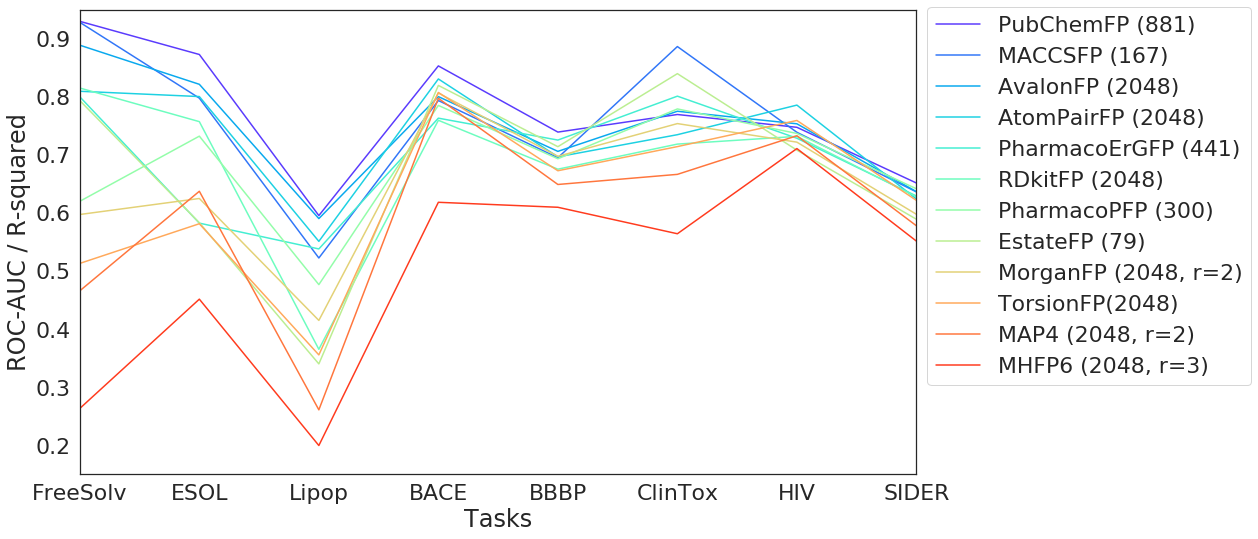

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize=(18,8))

res.T.plot(ax = ax, colors = colors) # [colormaps[i] for i in res.index]
ax.legend(bbox_to_anchor=(1.00, 1.03))
plt.xticks(range(len(res.T.index)), res.T.index,  rotation=0)
ax.set_ylabel('ROC-AUC / R-squared')
ax.set_ylim(0.15, 0.95)
fig.tight_layout()
fig.savefig('./html/fp_performances.svg', bbox_inches='tight', dpi=300)

In [7]:
 df.groupby(['fp_type', 'task_name'])['test_rmse'].apply(np.mean).unstack()

task_name,ESOL,FreeSolv,Lipop,PDBbind-full
fp_type,,,,
AtomPairFP,0.898461,1.727495,0.803987,0.783773
AvalonFP,0.859573,1.317779,0.766249,0.786187
EstateFP,1.317442,1.747072,0.978309,0.768406
MACCSFP,0.915067,1.076980,0.838536,0.767729
MAP4,1.231402,2.900756,1.035218,0.778865
MHFP6,1.502612,3.306840,1.077385,0.805873
MorganFP,1.247495,2.467293,0.923861,0.779688
PharmacoErGFP,1.313459,1.817468,0.817439,0.793710
PharmacoPFP,1.067395,2.482476,0.872431,0.784150


In [8]:
 df1.groupby(['fp_type', 'task_name'])['test_auc'].apply(np.mean).unstack()

task_name,ClinTox,MUV,SIDER,Tox21,ToxCast
fp_type,,,,,
AtomPairFP,0.734750,0.740834,0.624074,0.805628,0.682645
AvalonFP,0.775109,0.748298,0.636661,0.808983,0.666685
EstateFP,0.839870,0.692781,0.589190,0.757568,0.634829
MACCSFP,0.886530,0.755088,0.636240,0.803972,0.684944
MAP4,0.666445,0.596090,0.577932,0.727202,0.624724
MHFP6,0.564189,0.539277,0.551509,0.674551,0.549822
MorganFP,0.753876,0.732474,0.597705,0.787829,0.645996
PharmacoErGFP,0.801107,0.733856,0.629181,0.777630,0.643066
PharmacoPFP,0.779117,0.707826,0.641661,0.769964,0.651260


In [9]:
 df2.groupby(['fp_type', 'task_name'])['test_auc'].apply(np.mean).unstack()

task_name,BACE,BBBP,HIV
fp_type,,,
AtomPairFP,0.830737,0.696631,0.785713
AvalonFP,0.800302,0.706041,0.753525
EstateFP,0.819595,0.714118,0.708171
MACCSFP,0.793599,0.695057,0.738879
MAP4,0.797464,0.649035,0.732952
MHFP6,0.618357,0.609789,0.710870
MorganFP,0.806522,0.697530,0.721919
PharmacoErGFP,0.763225,0.725503,0.728655
PharmacoPFP,0.785175,0.693323,0.736889


In [11]:
mpr = res

In [13]:
knn = pd.read_pickle('knn.pkl')

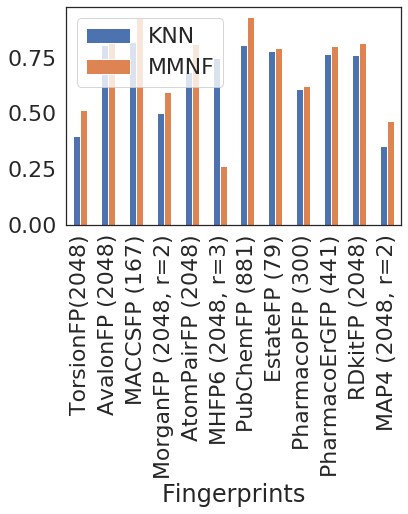

In [20]:
knn['FreeSolv'].to_frame(name = 'KNN').join(mpr['FreeSolv'].to_frame(name = 'MMNF')).plot(kind = 'bar')

Fingerprints
PubChemFP (881)         0.929928
MACCSFP (167)           0.928228
AvalonFP (2048)         0.888852
AtomPairFP (2048)       0.809519
PharmacoErGFP (441)     0.799961
RDkitFP (2048)          0.815132
PharmacoPFP (300)       0.620082
EstateFP (79)           0.793466
MorganFP (2048, r=2)    0.597349
TorsionFP(2048)         0.513152
MAP4 (2048, r=2)        0.465974
MHFP6 (2048, r=3)       0.263436
Name: FreeSolv, dtype: float64